# Basic regressor models to predict SoH

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('../dataset/processed/battery_health_dataset.csv')

X = data[['Voltage_measured', 'Current_measured', 'Temperature_measured', 'SoC', 'cycle_number']]
y = data['SoH']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# GridSearchCV Hyperparameter Tuning
rf_params = {
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

dt_params = {
    'max_depth': None,
    'min_samples_leaf': 4,
    'min_samples_split': 2
}

xgb_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 9,
    'n_estimators': 200,
    'subsample': 0.7
}

In [5]:
# Initialize the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR, OneClassSVM
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42, **rf_params),
    'Decision Tree': DecisionTreeRegressor(random_state=42, **dt_params),
    'XGBoost': XGBRegressor(random_state=42, **xgb_params),
}

In [6]:
results = {}
y_preds = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}
    y_preds[model_name] = y_pred

In [7]:

print(f"{'Model':<20}{'MAE':<10}{'RMSE':<10}{'R² Score':<10}")
print("="*50)
for model_name, metrics in results.items():
    print(f"{model_name:<20}{metrics['MAE']:<10.4f}{metrics['RMSE']:<10.4f}{metrics['R²']:<10.4f}")

Model               MAE       RMSE      R² Score  
Linear Regression   4.3318    5.2296    0.4534    
SVM                 3.8567    5.2750    0.4439    
KNN                 3.1307    4.4075    0.6118    
Random Forest       0.4787    1.3987    0.9609    
Decision Tree       0.4901    1.6525    0.9454    
XGBoost             0.5218    1.1879    0.9718    


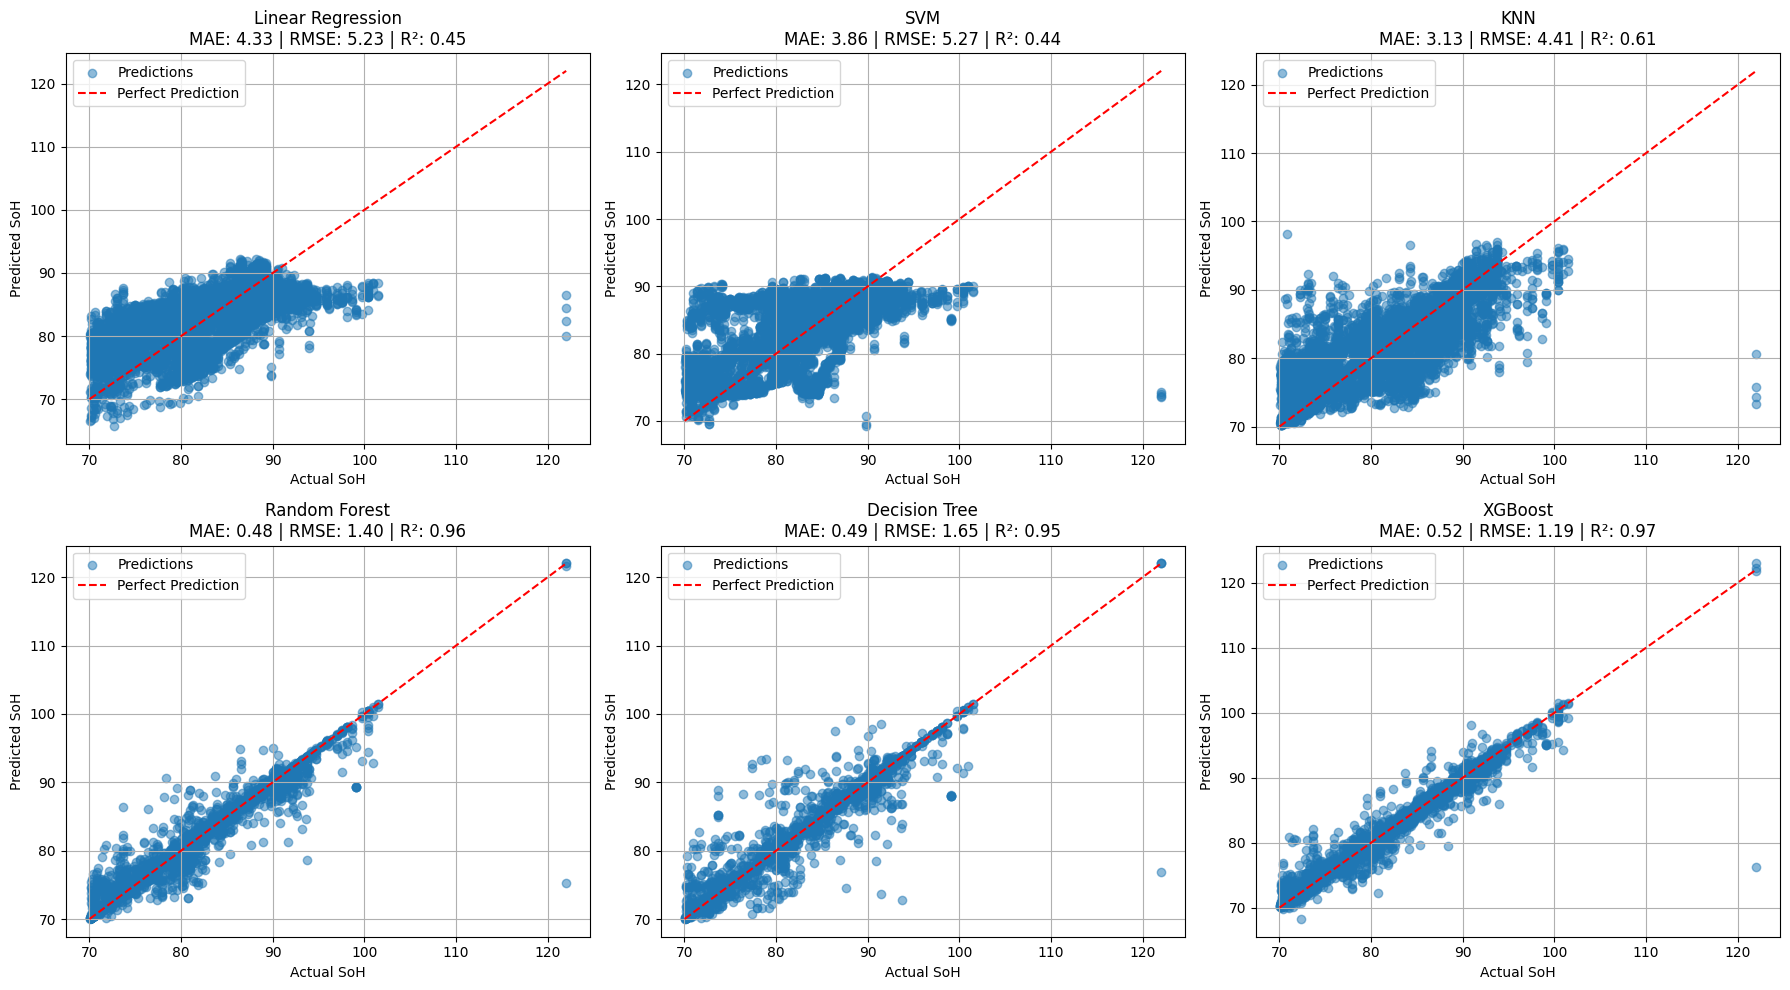

In [8]:
# Visualization: Actual vs Predicted SoH
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, (model_name, y_pred) in enumerate(y_preds.items()):
    ax = axes[i]
    ax.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
            color='red', linestyle='--', label='Perfect Prediction')

    ax.set_xlabel('Actual SoH')
    ax.set_ylabel('Predicted SoH')
    ax.set_title(f'{model_name}\nMAE: {results[model_name]["MAE"]:.2f} | '
                 f'RMSE: {results[model_name]["RMSE"]:.2f} | R²: {results[model_name]["R²"]:.2f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

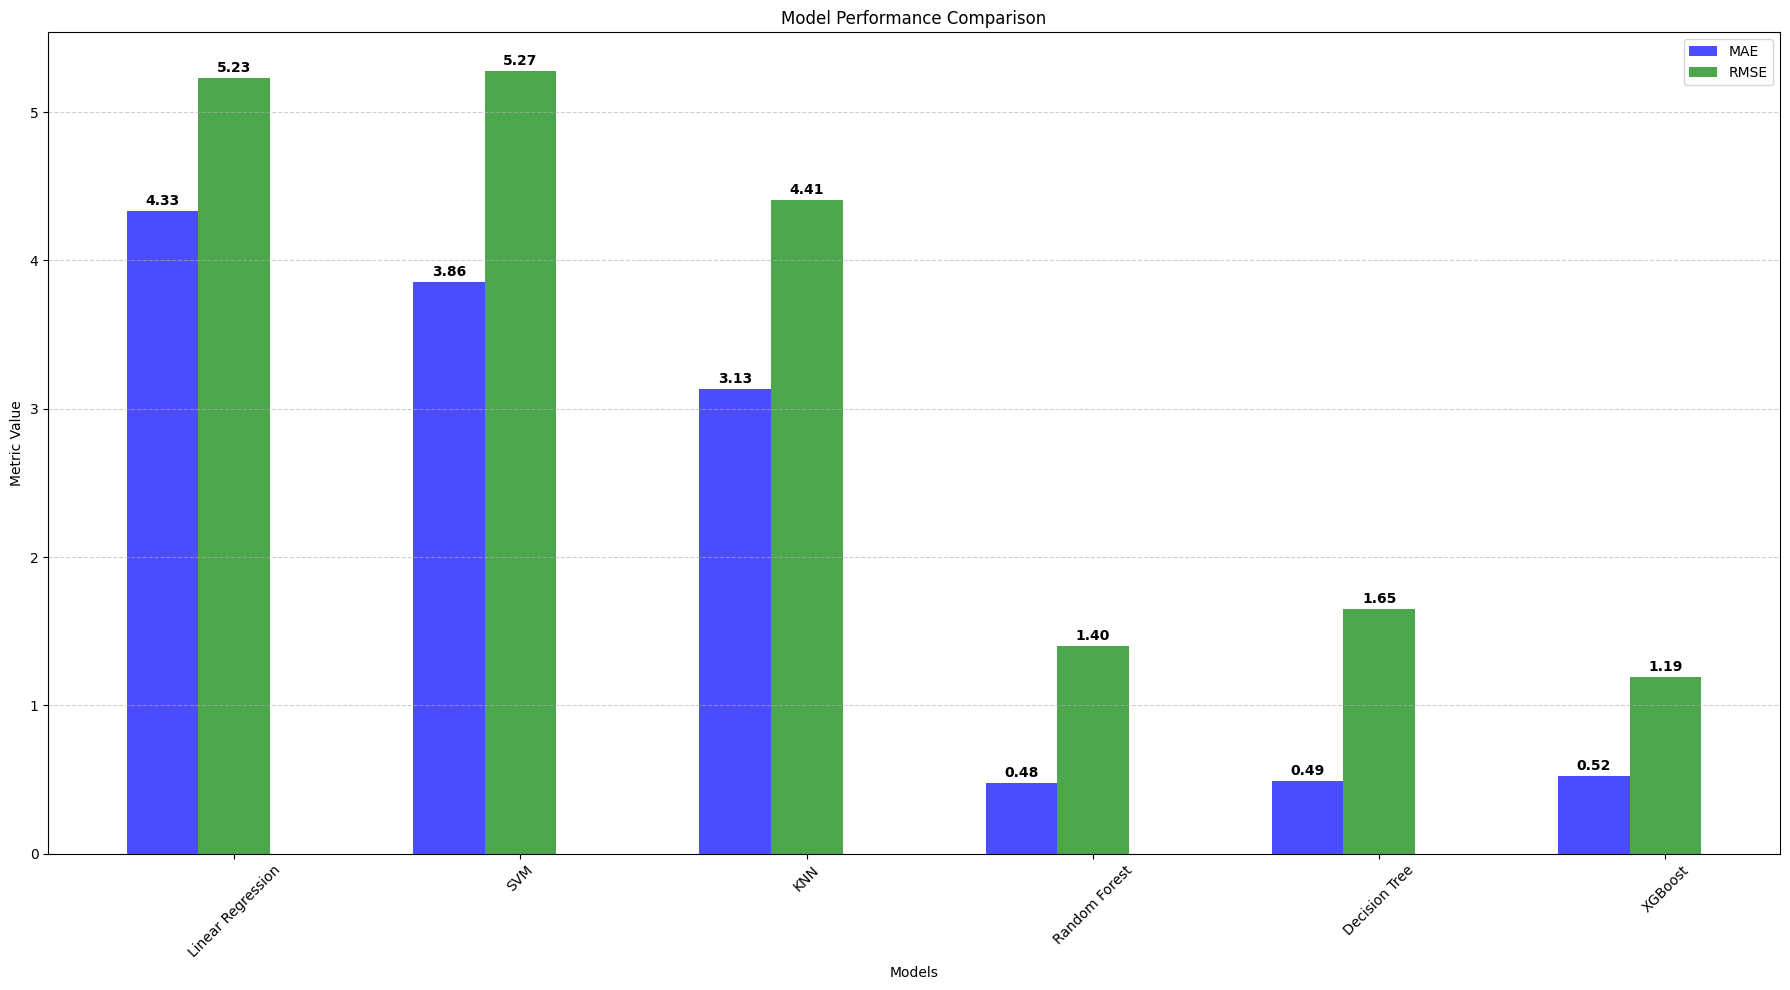

In [11]:
model_names = list(results.keys())
mae_values = [results[m]["MAE"] for m in model_names]
rmse_values = [results[m]["RMSE"] for m in model_names]
r2_values = [results[m]["R²"] for m in model_names]

fig, ax = plt.subplots(figsize=(18, 10))
bar_width = 0.25
index = np.arange(len(model_names))

bars_mae = ax.bar(index, mae_values, bar_width, label='MAE', color='blue', alpha=0.7)
bars_rmse = ax.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color='green', alpha=0.7)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

add_labels(bars_mae)
add_labels(bars_rmse)

ax.set_xlabel("Models")
ax.set_ylabel("Metric Value")
ax.set_title("Model Performance Comparison")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()